In [1]:
import pandas as pd
import os
import json

In [2]:
def get_results_df(sandbox_path, results_path, algorithm, repition, labeling_budgets, datasets):
    for dir in os.listdir(sandbox_path):
        datasets.append(dir)

        results_dict = {"algorithm":[], "dataset":[], "execution_number":[], 
                    "precision": [], "recall": [], "f_score": [],
                        "tp": [], "ed_tpfp": [], "ed_tpfn": [], "execution_time": [],
                        "number_of_labeled_tuples": [], "number_of_labeled_cells": [], "detected_errors_keys":[]}
        count = 0 
        d = []
        for i in repition:
            for dataset in datasets:
                for label_budget in labeling_budgets:
                    file_path = results_path + '/{}_{}_number#{}_${}$labels.json'\
                                .format(algorithm, dataset, str(i), str(label_budget))
                    if os.path.exists(file_path):
                        with open(file_path) as file:
                            json_content = json.load(file)
                            results_dict['algorithm'].append(algorithm)
                            results_dict['dataset'].append(dataset)
                            results_dict['execution_number'].append(i)
                            results_dict['precision'].append(json_content['precision'])
                            results_dict['recall'].append(json_content['recall'])
                            results_dict['f_score'].append(json_content['f_score'])
                            results_dict['tp'].append(json_content['tp'])
                            results_dict['ed_tpfp'].append(json_content['ed_tpfp'])
                            results_dict['ed_tpfn'].append(json_content['ed_tpfn'])
                            results_dict['execution_time'].append(json_content['execution-time'])
                            results_dict['number_of_labeled_tuples'].append(json_content['number_of_labeled_tuples'])
                            results_dict['number_of_labeled_cells'].append(json_content['number_of_labeled_cells'])
                            results_dict['detected_errors_keys'].append(json_content['detected_errors_keys'])
                    else:
                        print("The file does not exist: {}".format(file_path))
                
    result_df = pd.DataFrame.from_dict(results_dict)
    return result_df


In [3]:
def get_total_results(labeling_budgets, repition, result_df):
    total_results = {"labeling_budget":[], "precision": [], "recall": [], "f_score": []}
    for label_budget in labeling_budgets:
        avg_precision = 0
        avg_recall = 0
        avg_f_score = 0
        for rep in repition:
            res_rep = result_df[result_df['execution_number'] == rep]
            res_rep_lab = res_rep[res_rep['number_of_labeled_tuples'] == label_budget]
            precision = res_rep_lab['tp'].sum() / res_rep_lab['ed_tpfp'].sum()
            recall = res_rep_lab['tp'].sum() / res_rep_lab['ed_tpfn'].sum()
            f_score = 2 * precision * recall / (precision + recall)
            avg_precision += precision
            avg_recall += recall
            avg_f_score += f_score
        precision = avg_precision / len(repition)
        recall = avg_recall / len(repition)
        f_score = avg_f_score / len(repition)
        total_results['labeling_budget'].append(label_budget * 66)
        total_results['precision'].append(precision)
        total_results['recall'].append(recall)
        total_results['f_score'].append(f_score)
    total_results_df = pd.DataFrame.from_dict(total_results)
    return total_results_df

In [4]:
repition = range(1, 11)
labeling_budgets = range(1, 21)
sandbox_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/datasets/raha-datasets"
results_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/output/enough/exp_raha-enough-labels-5-datasets"


# repition = range(1, 10)
# labeling_budgets = range(1, 21)
# # labeling_budgets = [11, 22, 33, 77, 88, 99, 101, 112]
# sandbox_path = "/home/fatemeh/EDS-Datasets/data-gov-old/data-gov-sandbox"
# results_path = "/home/fatemeh/temp-dgov-exp/exp_raha-enough-labels-data-gov-old"
# # sandbox_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/datasets/kaggle_8"
# # results_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/output/enough/exp_raha-enough-labels-lake-kaggle-8"
datasets = []
algorithm = 'raha'
result_df = get_results_df(sandbox_path, results_path, algorithm, repition, labeling_budgets, datasets)
total_results = get_total_results(labeling_budgets, repition, result_df)

In [ ]:
# total_results_2 = total_results.drop(total_results.index[8:])


In [ ]:
# total_results_2

In [7]:
import os 
import pickle
import pandas as pd
# raha labelings
labeling_budgets = [22, 33, 66, 132, 198, 264, 330, 396, 462, 528, 594, 660, 726, 858, 924, 990, 1056, 1122, 1188, 1254, 1320]
# labeling_budgets = [11, 22, 33, 77, 88, 99, 101, 112]
# labeling_budgets = [98, 245, 294, 392]
                    #, 686, 784, 882, 980]
# o = [, 1078, 1176, 1274, 1372, 1470, 1568, 1666, 1764, 1862, 1960]]
# labeling_budgets = [22, 33, 66, 132, 198, 264]
# labeling_budgets = [500, 1000, 2015, 4030, 6045, 8060, 10075, 12090, 14105, 16120, 18135, 20150, 22165, 24180, 26195]
res_dict = {"labeling_budget": [], "precision": [], "recall": [], "fscore": []}
# labeling_budgets = [25, 49, 98, 196, 245, 294, 392, 490, 588, 686, 784, 882, 980, 1078, 1176]
# exp_name = "_k-bug-fix-0"
# path = "/home/fatemeh/ED-Scale/marshmallow_pipeline/output/kaggle-dataset/kaggle-bug-fix-0"

for label_budget in labeling_budgets:
    # path = "/home/fatemeh/ED-Scale/marshmallow_pipeline/output/kaggle-dataset/kaggle-col_group-check-charfixed/_k-charfixed_{}_labels/results".format(label_budget)
    path = "/home/fatemeh/ED-Scale/marshmallow_pipeline/output_hierarchical/dgov/_dgov_{}_labels/results".format(label_budget)
    with open(os.path.join(path, "scores_all.pickle"), "rb") as f:
        scores_all = pickle.load(f)
        res_dict["labeling_budget"].append(label_budget)
        res_dict["precision"].append(scores_all["total_precision"])
        res_dict["recall"].append(scores_all["total_recall"])
        res_dict["fscore"].append(scores_all["total_fscore"])


res_df_eds = pd.DataFrame(res_dict)

In [ ]:
res_df_eds

In [ ]:
import os 
import pickle
import pandas as pd
# raha labelings
# labeling_budgets = [22, 33, 66, 132, 198, 264, 330, 396, 462, 528, 594, 660, 726, 858, 924, 990, 1056, 1122, 1188, 1254, 1320]
# labeling_budgets = [11, 22, 33, 77, 88, 99, 101, 112]
# labeling_budgets = [25, 49, 98, 196, 245, 294, 392, 490, 588, 686, 784, 882, 980, 1078, 1176, 1274, 1372, 1470, 1568, 1666, 1764, 1862, 1960]
                    #, 686, 784, 882, 980]
# o = [, 1078, 1176, 1274, 1372, 1470, 1568, 1666, 1764, 1862, 1960]]
# labeling_budgets = [22, 33, 66, 132, 198, 264]
# labeling_budgets = [500, 1000, 2015, 4030, 6045, 8060, 10075, 12090, 14105]
#,, 4030, 6045, 8060, 10075, 12090, 14105, 16120, 18135, 20150, 22165, 24180, 26195, 28210, 30225, 32240, 34255, 36270, 38285, 40300]
res_dict = {"labeling_budget": [], "precision": [], "recall": [], "fscore": []}
# labeling_budgets = [25, 49, 98, 196, 245, 294, 392, 490, 588, 686, 784, 882, 980, 1078, 1176]
# exp_name = "_k-bug-fix-0"
# path = "/home/fatemeh/ED-Scale/marshmallow_pipeline/output/kaggle-dataset/kaggle-bug-fix-0"

for label_budget in labeling_budgets:
    path = "/home/fatemeh/ED-Scale/marshmallow_pipeline/output/kaggle-dataset/kaggle-alltrain/_k-alltrain_{}_labels/results".format(label_budget)
    # path = "/home/fatemeh/ED-Scale/marshmallow_pipeline/output/kaggle-dataset/dgov-old-min-2/_dgov-old_{}_labels/results".format(label_budget)
    with open(os.path.join(path, "scores_all.pickle"), "rb") as f:
        scores_all = pickle.load(f)
        res_dict["labeling_budget"].append(label_budget)
        res_dict["precision"].append(scores_all["total_precision"])
        res_dict["recall"].append(scores_all["total_recall"])
        res_dict["fscore"].append(scores_all["total_fscore"])


res_df_eds_2 = pd.DataFrame(res_dict)

In [ ]:
res_df_eds_2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# Assuming you have a DataFrame called 'df' with columns: labeling_budget, precision, recall, f_score

# Extracting the required columns
labeling_budget = res_dict['labeling_budget']
f_score = res_dict['fscore']

# Creating the line plot
plt.figure(figsize=(12, 6))  # Adjust the width and height as desired
plt.plot(labeling_budget, f_score, marker='o')

# Setting the axis labels and title
plt.xlabel('Labeling Budget')
plt.ylabel('F-Score')
plt.title('F-Score based on Labeling Budget')
plt.ylim(0, 1)

# x_ticks = np.arange(66, 1387, 66)  # Assuming labeling_budget range is 1 to 20
# plt.xticks(x_ticks)

# Displaying the plot
plt.show()


In [ ]:
total_results

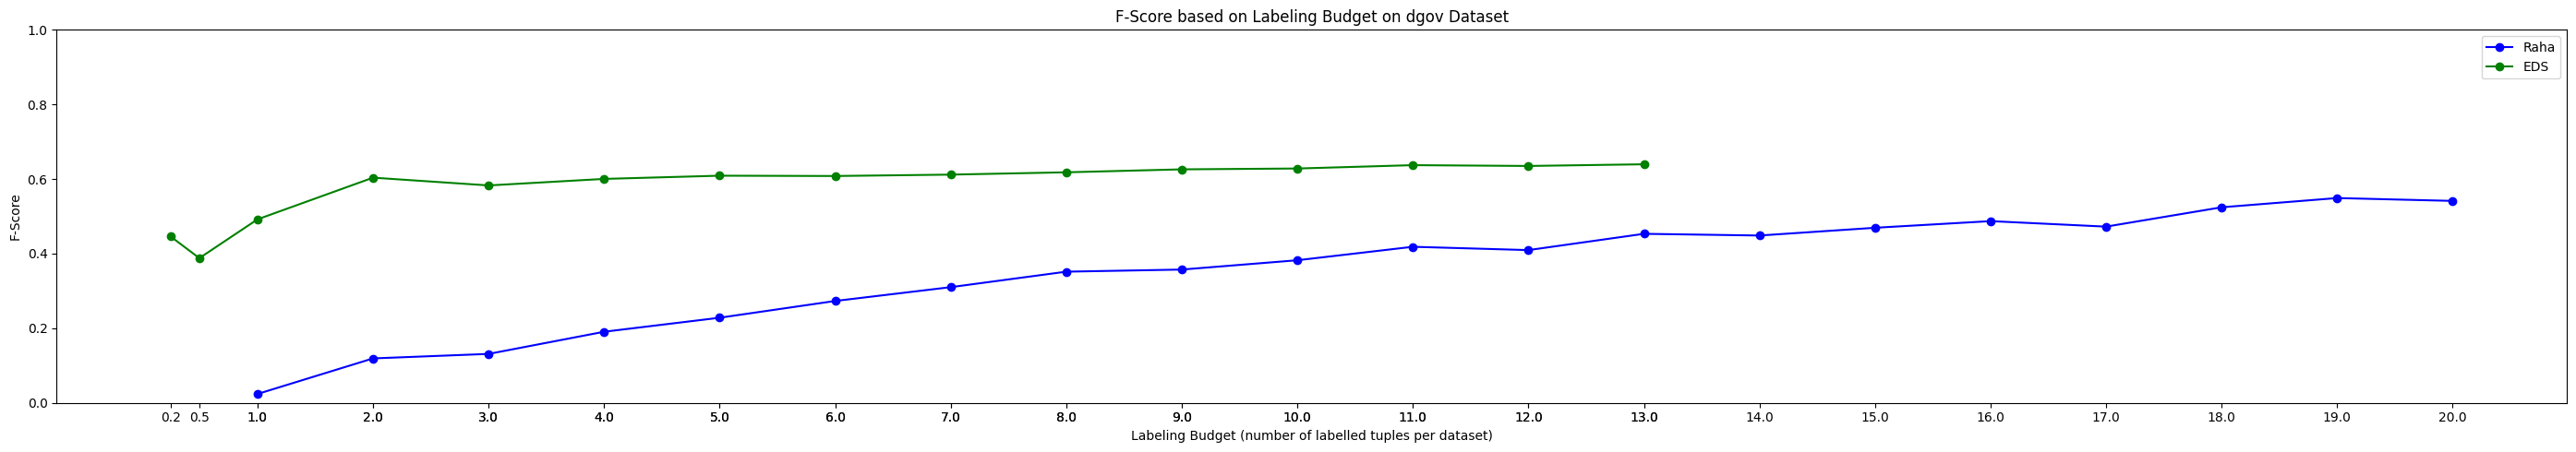

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have two DataFrames called 'df1' and 'df2' with columns: labeling_budget, precision, recall, f_score

# Extracting the required columns from the first DataFrame
labeling_budget1 = total_results['labeling_budget']
f_score1 = total_results['f_score']

# Extracting the required columns from the second DataFrame
labeling_budget2 = res_df_eds['labeling_budget']
f_score2 = res_df_eds['fscore']

# Creating the line plot
plt.figure(figsize=(28, 5))  # Adjust the width and height as desired

# Plotting the first method's data
plt.plot(labeling_budget1, f_score1, marker='o', color='blue', label='Raha')

# Plotting the second method's data
plt.plot(labeling_budget2, f_score2, marker='o', color='green', label='EDS')

# Setting the axis labels and title
plt.xlabel('Labeling Budget (number of labelled tuples per dataset)')
plt.ylabel('F-Score')
plt.title('F-Score based on Labeling Budget on dgov Dataset')

# Setting the X-axis tick locations and labels
# x_ticks = np.arange(66, 1387, 66) # Assuming labeling_budget range is 1 to 20
# plt.xticks(x_ticks)

x_ticks = np.concatenate([labeling_budget1, labeling_budget2])
x_labels = [str(round(lb/2015, 1)) for lb in x_ticks]
plt.xticks(x_ticks, x_labels)

plt.ylim(0, 1)

# Displaying the legend
plt.legend()

plt.tight_layout()

# Displaying the plot
plt.show()


In [ ]:
def get_results_per_table(result_df, labeling_budgets, repition):
    results_per_table = {"dataset":[], "labeling_budget":[], "precision": [], "recall": [], "f_score": []}
    datasets = result_df['dataset'].unique()
    for dataset in datasets:
        res_dataset = result_df[result_df['dataset'] == dataset]
        for label_budget in labeling_budgets:
            print(label_budget)
            total_precision = 0
            total_recall = 0
            total_f_score = 0
            for rep in repition:
                res_rep = res_dataset[result_df['execution_number'] == rep]
                res_rep_lab = res_rep[res_rep['number_of_labeled_tuples'] == label_budget]
                precision = res_rep_lab['tp'].sum() / res_rep_lab['ed_tpfp'].sum()
                recall = res_rep_lab['tp'].sum() / res_rep_lab['ed_tpfn'].sum()
                f_score = (2 * precision * recall) / (precision + recall)
                
                total_precision += precision
                total_recall += recall
                total_f_score += f_score
    
            precision = total_precision / len(repition)
            recall = total_recall / len(repition)
            f_score = total_f_score / len(repition)
            
            print(precision, recall, f_score)
            results_per_table['dataset'].append(dataset)
            results_per_table['labeling_budget'].append(label_budget * 66)
            results_per_table['precision'].append(precision)
            results_per_table['recall'].append(recall)
            results_per_table['f_score'].append(f_score)
    results_per_table_df = pd.DataFrame.from_dict(results_per_table)
    return results_per_table_df
results_per_table_df = get_results_per_table(result_df, labeling_budgets, repition)  

In [ ]:
results_per_table_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns: dataset, labeling_budget, precision, recall, f_score

# Get unique datasets in the DataFrame
datasets = results_per_table_df['dataset'].unique()

# Create the line plot for all datasets
plt.figure(figsize=(12, 6))  # Adjust the width and height as desired

# Iterate over each dataset
for dataset in datasets:
    # Filter the DataFrame for the current dataset
    dataset_df = results_per_table_df[results_per_table_df['dataset'] == dataset]

    # Extract the required columns
    labeling_budget = dataset_df['labeling_budget']
    f_score = dataset_df['f_score']

    # Generate a random color for the line
    color = np.random.rand(3)

    # Create the line plot for the current dataset with a unique color
    plt.plot(labeling_budget, f_score, marker='o', color=color, label=dataset)

# Setting the axis labels and title
plt.xlabel('Labeling Budget')
plt.ylabel('F-Score')
plt.title('F-Score based on Labeling Budget')

# Setting the X-axis tick locations and labels
x_ticks = np.arange(66, 1387, 66)  # Generate ticks from 66 to 1386 with a step of 66
plt.xticks(x_ticks)

# Displaying the legend
plt.legend()

# Displaying the plot
plt.show()


# Non Enough Labels 

In [ ]:
def get_results_df_ne(sandbox_path, results_path, algorithm, repition, labeling_budgets, datasets):
    for dir in os.listdir(sandbox_path):
        datasets.append(dir)

        results_dict = {"algorithm":[], "dataset":[], "execution_number":[], 
                    "precision": [], "recall": [], "f_score": [],
                        "tp": [], "ed_tpfp": [], "ed_tpfn": [], "execution_time": [],
                        "number_of_labeled_tuples": [], "number_of_labeled_cells": [], "detected_errors_keys":[]}
        count = 0 
        d = []
        for i in repition:
            for dataset in datasets:
                for label_budget in labeling_budgets:
                    results_path_ = os.path.join(results_path, f"results_{label_budget}_{i}")
                    file_path = results_path_ + '/{}_{}_number#{}_*labels.json'\
                                .format(algorithm, dataset, str(i))
                    if os.path.exists(file_path):
                        with open(file_path) as file:
                            print("************")
                            json_content = json.load(file)
                            results_dict['algorithm'].append(algorithm)
                            results_dict['dataset'].append(dataset)
                            results_dict['execution_number'].append(i)
                            results_dict['precision'].append(json_content['precision'])
                            results_dict['recall'].append(json_content['recall'])
                            results_dict['f_score'].append(json_content['f_score'])
                            results_dict['tp'].append(json_content['tp'])
                            results_dict['ed_tpfp'].append(json_content['ed_tpfp'])
                            results_dict['ed_tpfn'].append(json_content['ed_tpfn'])
                            results_dict['execution_time'].append(json_content['execution-time'])
                            results_dict['number_of_labeled_tuples'].append(json_content['number_of_labeled_tuples'])
                            results_dict['number_of_labeled_cells'].append(json_content['number_of_labeled_cells'])
                            results_dict['detected_errors_keys'].append(json_content['detected_errors_keys'])
                    else:
                        print("The file does not exist: {}".format(file_path))
                        
                
    result_df = pd.DataFrame.from_dict(results_dict)
    return result_df


In [ ]:
repition = range(1, 11)
# labeling_budgets = range(1, 21)
labeling_budgets = [11, 22, 33, 77, 88, 99, 101, 112]
sandbox_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/datasets/raha-datasets"
results_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/output/exp_raha-non-enough-labels-5-datasets"
# sandbox_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/datasets/kaggle_8"
# results_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/output/enough/exp_raha-enough-labels-lake-kaggle-8"
datasets = []
algorithm = 'raha'
result_df = get_results_df_ne(sandbox_path, results_path, algorithm, repition, labeling_budgets, datasets)
total_results = get_total_results(labeling_budgets, repition, result_df)

In [ ]:
result_df

In [ ]:
import get_plots

repitions = range(1, 11)
labeling_budgets_raha = range(1, 21)
sandbox_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/datasets/raha-datasets"
results_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/output/enough/exp_raha-enough-labels-5-datasets"

total_results = get_plots.get_raha_res(repitions, labeling_budgets_raha, sandbox_path, results_path)

labeling_budgets = [25, 49, 98, 196, 245, 294, 392, 490, 588, 686, 784, 882, 980, 1078, 1176]
#, 1274, 1372, 1470, 1568, 1666, 1764, 1862, 1960]
# labeling_budgets = [25, 49, 98, 196, 245, 294, 392, 490]
exp_name = "_raha-after-bug-fix"
path = "/home/fatemeh/ED-Scale/marshmallow_pipeline/output/raha-after-bug-fix"
res_df_eds = get_plots.get_eds_res(path, exp_name, labeling_budgets)

plot_path = "/home/fatemeh/EDS-BaseLines/Raha/pictures/KMeans"
dataset_name = "kaggle_8"
get_plots.plot(total_results, res_df_eds, plot_path, dataset_name)

In [ ]:
eds_res

In [ ]:
import get_plots

repitions = range(1, 11)
labeling_budgets_raha = range(1, 21)
sandbox_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/datasets/kaggle_8"
results_path = "/home/fatemeh/EDS-BaseLines/Raha/raha/output/enough/exp_raha-enough-labels-lake-kaggle-8"

total_results = get_plots.get_raha_res(repitions, labeling_budgets_raha, sandbox_path, results_path)

labeling_budgets = [25, 49, 98, 196, 245, 294, 392, 490, 588, 686, 784, 882, 980, 1078, 1176]
#, 1274, 1372, 1470, 1568, 1666, 1764, 1862, 1960]
# labeling_budgets = [25, 49, 98, 196, 245, 294, 392, 490]
exp_name = "_k-bug-fix-0"
path = "/home/fatemeh/ED-Scale/marshmallow_pipeline/output/kaggle-dataset/kaggle-bug-fix-0"
res_df_eds = get_plots.get_eds_res(path, exp_name, labeling_budgets)

plot_path = "/home/fatemeh/EDS-BaseLines/Raha/pictures/KMeans"
dataset_name = "kaggle_8"
get_plots.plot(total_results, res_df_eds, plot_path, dataset_name)